In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# The CIFAR-10 dataset
The CIFAR-10 dataset consists of <b>60000 32x32 </b>colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class.

The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


* <b>data</b> -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
* <b>labels</b> -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:
* <b>label_names</b> -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[4] == "automobile", etc.

In [66]:
(X_train, y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [67]:
X_test.shape

(10000, 32, 32, 3)

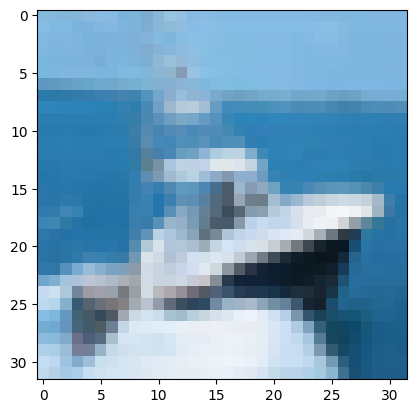

In [68]:
plt.imshow(X_train[8])

In [69]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Building an ANN model

In [70]:
ann = models.Sequential([ layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='sigmoid')
])

In [71]:
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [72]:
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8129 - accuracy: 0.3545
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6240 - accuracy: 0.4258
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5395 - accuracy: 0.4575
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4813 - accuracy: 0.4765
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4325 - accuracy: 0.4957
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3877 - accuracy: 0.5123
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3502 - accuracy: 0.5256
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3160 - accuracy: 0.5390
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2813 - accuracy: 0.5514
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.252

Here we have seen that by using <b>ANN</b>, we got <b>accuracy very less</b> that is **56%** and also loss is **1.25** that is not preferable.

Let's checkout using CNN

# Building an CNN model

In [84]:
cnn = models.Sequential([
layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

In [85]:
cnn.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4660 - accuracy: 0.4709
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1290 - accuracy: 0.6041
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9945 - accuracy: 0.6547
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9128 - accuracy: 0.6821
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8561 - accuracy: 0.7023
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8014 - accuracy: 0.7205
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7548 - accuracy: 0.7373
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7125 - accuracy: 0.7500
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6738 - accuracy: 0.7659
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.632

And here we can see that the our model built very good using CNN  as compare to ANN. Thats why CNN prefer for image dataset instead of ANN.

By using **CNN** we got **accuacy 78%** that is much good and  **loss is 0.63** which is low as compare to ANN so, According to above comparision of ANN and CNN,  we will go for CNN for image dataset.



In [75]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.9373 - accuracy: 0.6823


[0.9373019337654114, 0.6822999715805054]

# Make Prediction

In [76]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [77]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [78]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.2291345e-03, 1.9461836e-04, 2.0708079e-03, 6.5113372e-01,
        1.2219420e-03, 5.0582558e-02, 7.5829437e-04, 9.7849981e-05,
        2.9050839e-01, 2.0279281e-04],
       [7.3894416e-03, 2.7255094e-01, 3.4677621e-05, 8.0785931e-06,
        1.9981396e-06, 3.5435065e-07, 3.2222545e-07, 1.6196063e-06,
        7.1627182e-01, 3.7407912e-03],
       [1.2774023e-01, 8.2430847e-02, 4.5987763e-03, 3.3338615e-03,
        3.0069721e-03, 2.3679256e-04, 2.0330188e-04, 1.3329330e-02,
        7.4047667e-01, 2.4643159e-02],
       [9.1348475e-01, 2.0845351e-03, 2.5802103e-03, 2.0253703e-03,
        1.3103040e-02, 2.7045104e-05, 4.7731322e-05, 9.5374521e-04,
        6.5603487e-02, 9.0279063e-05],
       [7.0908027e-07, 2.1326031e-07, 3.4261544e-03, 1.0786828e-01,
        3.0973023e-01, 3.0621360e-03, 5.7583481e-01, 2.6778496e-05,
        4.6625406e-05, 4.0006435e-06]], dtype=float32)

In [79]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [80]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [81]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

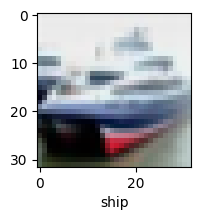

In [82]:
plot_sample(X_test, y_test,1)

In [83]:
classes[y_classes[1]]

'ship'

# Interpretation

Artificial Neural Networks (**ANNs**) and Convolutional Neural Networks (**CNNs**) are both types of neural networks used in machine learning, but they are designed for different types of data and tasks. When it comes to image classification tasks like CIFAR-10, CNNs are preferred for several reasons:

* **Spatial Hierarchies and Local Patterns:** CNNs are specifically designed to work well with grid-like data, such as images. They excel at capturing spatial hierarchies and local patterns in data. This is crucial for image data because objects in images are composed of local features that can be detected through convolutional layers.

* **Convolutional Layers:** CNNs have convolutional layers that automatically learn features from the data. These layers are capable of detecting edges, textures, and more complex features in an image. In contrast, ANNs treat each input feature (e.g., pixel) as independent, which doesn't capture the spatial relationships in images effectively.

* **Parameter Sharing:** CNNs use parameter sharing, which means the same set of weights is applied to different parts of the input data. This reduces the number of parameters compared to ANNs, making CNNs computationally efficient and less prone to overfitting, which is especially important when you have limited training data like CIFAR-10.

* **Pooling Layers:** CNNs often include pooling layers that help reduce the spatial dimensions of the data while retaining essential information. This downsampling allows the network to focus on the most relevant features and speeds up computation.